In [1]:
import json
import numpy as np
import pandas as pd
import raw_data_processing as rdp

In [2]:
def liters_to_gallons(liters): return liters/3.785

In [26]:
def write_time_vs_speed_data_to_csv(data):
    table = rdp.get_table(data)
    cols_wanted = ['timestamp','vehicle_speed', 'fuel_consumed_since_restart','odometer']
    cols_to_delete = []
    for col in list(table):
        if col not in cols_wanted:
            cols_to_delete.append(col)
    table = table.drop(cols_to_delete, axis=1)
    table = rdp.remove_nan_from_table(table, cols_wanted)
    np_delta_d = np.diff(table['odometer'], n = 1000)
    print(len(np_delta_d))
    np_delta_f = np.diff(table['fuel_consumed_since_restart'], n = 1000)
    print(np.argmax(np_delta_f))
    print(np_delta_d[11811])
    np_mpg = np.divide(np_delta_d, np_delta_f, out = np.zeros_like(np_delta_d), where=np_delta_f != 0)
    print(max(np_mpg))
    print(len([0, 0] + list(np_mpg)))
    print(len(table))
    table['instantaneous_mpg'] = [0] *1000 + list(np_mpg)
    print(table.shape)
    table.drop(table.columns.difference(["timestamp", "vehicle_speed"]), 1, inplace=True)
    table.to_csv('time_v_speed.csv')
    return table

In [27]:
df = write_time_vs_speed_data_to_csv('highway-speeding.json')
df

74693
46826
-3.193576962722691e+296
7.250038025064129e+300
74695
75693
(75693, 5)


,timestamp,vehicle_speed
0,1.361455e+09,0.000000
1,1.361455e+09,0.000000
2,1.361455e+09,0.000000
3,1.361455e+09,0.000000
4,1.361455e+09,0.000000
...,...,...
75688,1.361455e+09,57.479996
75689,1.361455e+09,57.479996
75690,1.361455e+09,57.479996
75691,1.361455e+09,57.479996


In [15]:
pd.__version__

'0.25.1'

In [16]:
df.drop(df.columns.difference(["timestamp", "instantaneous_mpg"]), 1, inplace=True)

In [17]:
df

,timestamp,instantaneous_mpg
0,1.361455e+09,0.000000
1,1.361455e+09,0.000000
2,1.361455e+09,0.000000
3,1.361455e+09,0.000000
4,1.361455e+09,0.000000
...,...,...
75688,1.361455e+09,37.245326
75689,1.361455e+09,25.652859
75690,1.361455e+09,15.733931
75691,1.361455e+09,7.253769


In [18]:
df.plot(x = "timestamp", y="instantaneous_mpg", kind="line")

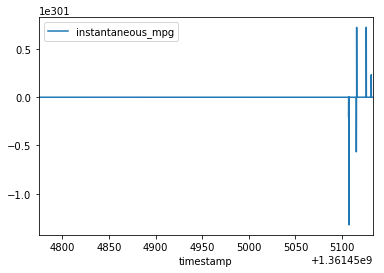

In [19]:
plt.show()


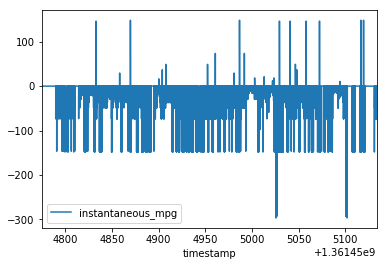

In [12]:
import matplotlib.pyplot as plt
plt.show()

In [ ]:
print(df[df["instantaneous_mpg"] != 0])

In [ ]:
np.repeat([1,2,3], 2)